# Financial Portfolio Data Collection (Magnificent 7 vs Market)
- **Author:** Wiseman Radebe
- **Date:** 05/05/25
- **Objective:** Collect and validate financial data for portfolio analysis

---

## Table of Contents
1. [Environment Setup]
2. [Data Sources Configuration]
3. [Stock Data Collection]
4. [Data Quality Checks]
5. [Data Export]
6. [Summary]

---

# 1. Environment Setup
Setting up the required libraries and configurations for data collection.

In [2]:
# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Financial data libraries
import yfinance as yf

# Configuration
plt.style.use('seaborn-v0_8')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.4f}'.format)

print("Environment setup complete!")
print(f"pandas version: {pd.__version__}")
print(f"Current date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Environment setup complete!
pandas version: 2.3.1
Current date: 2025-08-21 20:20:49


# 2. Data Sources Configuration
Define our portfolio composition and data collection parameters.

In [3]:
# Portfolio configuration
TICKERS = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA','TSLA','META', 'SPY']
START_DATE = '2021-01-01'
END_DATE = '2025-01-01'

# Create portfolio info dictionary
PORTFOLIO_INFO = {
    'AAPL': 'Apple Inc.',
    'MSFT': 'Microsoft Corporation', 
    'GOOGL': 'Alphabet Inc.',
    'AMZN': 'Amazon.com Inc.',
    'NVDA': 'Nvidia',
    'TSLA': 'Tesla',
    'META': 'Meta',
    'SPY': 'SPDR S&P 500 ETF Trust'
}

print("Portfolio Configuration:")
print(f"Tickers: {TICKERS}")
print(f"Date Range: {START_DATE} to {END_DATE}")
print(f"Number of stocks: {len(TICKERS)}")

Portfolio Configuration:
Tickers: ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'TSLA', 'META', 'SPY']
Date Range: 2021-01-01 to 2025-01-01
Number of stocks: 8


# 3. Stock Data Collection
Collecting historical price data with proper error handling.

In [4]:
def collect_stock_data(tickers, start_date, end_date):
    """
    Collect stock data for multiple tickers with error handling
    
    Parameters:
    -----------
    tickers : list
        List of stock ticker symbols
    start_date : str
        Start date in 'YYYY-MM-DD' format
    end_date : str
        End date in 'YYYY-MM-DD' format
        
    Returns:
    --------
    dict : Dictionary containing DataFrames for each ticker
    """
    stock_data = {}
    failed_tickers = []
    
    print("Collecting stock data...")
    print("-" * 40)
    
    for ticker in tickers:
        try:
            print(f"Downloading {ticker}...", end=" ")
            data = yf.download(ticker, start=start_date, end=end_date, progress=False)
            
            if data.empty:
                print("❌ No data found")
                failed_tickers.append(ticker)
            else:
                stock_data[ticker] = data
                print(f"✅ {len(data)} rows collected")
                
        except Exception as e:
            print(f"❌ Error: {str(e)}")
            failed_tickers.append(ticker)
    
    print("-" * 40)
    print(f"Successfully collected: {len(stock_data)} stocks")
    if failed_tickers:
        print(f"Failed tickers: {failed_tickers}")
    
    return stock_data, failed_tickers

# Execute data collection
stock_data, failed_stocks = collect_stock_data(TICKERS, START_DATE, END_DATE)

----------------------------------------
----------------------------------------
Successfully collected: 8 stocks


# 4. Data Quality Checks
Performing comprehensive data validation and quality assessment.

In [18]:
def assess_data_quality(stock_data):
    """Comprehensive data quality assessment"""
    
    quality_report = {}
    
    print("Data Quality Assessment")
    print("=" * 50)
    
    for ticker, data in stock_data.items():
        print(f"\n📊 {ticker} ({PORTFOLIO_INFO.get(ticker, 'Unknown')})")
        print("-" * 30)
        
        # Basic info
        print(f"Date range: {data.index[0].date()} to {data.index[-1].date()}")
        print(f"Total observations: {len(data)}")
        
        # Missing data check
        missing_data = data.isnull().sum()
        print(f"Missing values: {missing_data.sum()}")
        if missing_data.sum() > 0:
            print("⚠️  Missing data found:")
            print(missing_data[missing_data > 0])
        
        # Price validation
        if (data['Close'] <= 0).any():
            print("⚠️  Zero or negative prices found!")
        
        # Volume validation  
        avg_volume = data['Volume'].mean()
        print(f"Average daily volume: {avg_volume:,.0f}")
        
        # Store quality metrics
        quality_report[ticker] = {
            'observations': len(data),
            'missing_values': missing_data.sum(),
            'date_range': (data.index[0], data.index[-1]),
            'avg_volume': avg_volume,
            'price_range': (data['Close'].min(), data['Close'].max())
        }
    
    return quality_report



# 5. Data Export
Saving collected data for analysis in subsequent notebooks.

In [19]:
import os
import pandas as pd

# Create directories if they don't exist
os.makedirs('data/raw', exist_ok=True)
os.makedirs('data/processed', exist_ok=True)

# Export individual stock files (only if stock_data exists)
if stock_data:
    print("Exporting individual stock data files...")
    for ticker, data in stock_data.items():
        filename = f'data/raw/{ticker}_data.csv'
        data.to_csv(filename)
        print(f"✅ Saved {ticker} data to {filename}")
else:
    print("⚠️ No stock data to save.")


print(f"\nData collection completed successfully!")
print(f"Files saved in: data/ directory")




Exporting individual stock data files...
✅ Saved AAPL data to data/raw/AAPL_data.csv
✅ Saved MSFT data to data/raw/MSFT_data.csv
✅ Saved GOOGL data to data/raw/GOOGL_data.csv
✅ Saved AMZN data to data/raw/AMZN_data.csv
✅ Saved NVDA data to data/raw/NVDA_data.csv
✅ Saved TSLA data to data/raw/TSLA_data.csv
✅ Saved META data to data/raw/META_data.csv
✅ Saved SPY data to data/raw/SPY_data.csv

Data collection completed successfully!
Files saved in: data/ directory


# 6. Summary
Key outcomes and next steps from data collection phase.

In [15]:
# Summary statistics
print("DATA COLLECTION SUMMARY")
print("=" * 50)
print(f"Target stocks: {len(TICKERS)}")
print(f"Successfully collected: {len(stock_data)}")
print(f"Date range: {START_DATE} to {END_DATE}")
print(f"Total data points: {sum(len(data) for data in stock_data.values()):,}")

# Preview of collected data
print(f"\n📈 SAMPLE DATA PREVIEW")
print("-" * 30)
sample_ticker = list(stock_data.keys())[0]
print(f"Sample from {sample_ticker}:")
display(stock_data[sample_ticker].head())


DATA COLLECTION SUMMARY
Target stocks: 8
Successfully collected: 8
Date range: 2021-01-01 to 2025-01-01
Total data points: 8,040

📈 SAMPLE DATA PREVIEW
------------------------------
Sample from AAPL:


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2021-01-04,126.0966,130.1890,123.5144,130.1014,143301900
2021-01-05,127.6556,128.3669,125.1417,125.5899,97664900
2021-01-06,123.3585,127.6946,123.1442,124.4499,155088000
2021-01-07,127.5679,128.2597,124.5863,125.0735,109578200
2021-01-08,128.6690,129.2341,126.8956,129.0393,105158200


# Financial Portfolio Exploratory Data Analysis
- **Author:** Wiseman Radebe
- **Date:** 12/05/2025
- **Objective:** Explore portfolio data patterns, distributions, and relationships

## Table of Contents
1. [Data Loading & Setup]
2. [Price Trend Analysis]
3. [Financial Metrics Calculations and Visualization]
4. [Portfolio Performance Insights]

# 1. Data Loading & Setup
Setting up the required libraries and configurations

In [25]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# 2. Price Trend Visualization
Visualization of the magnificent Seven along with SNP 500

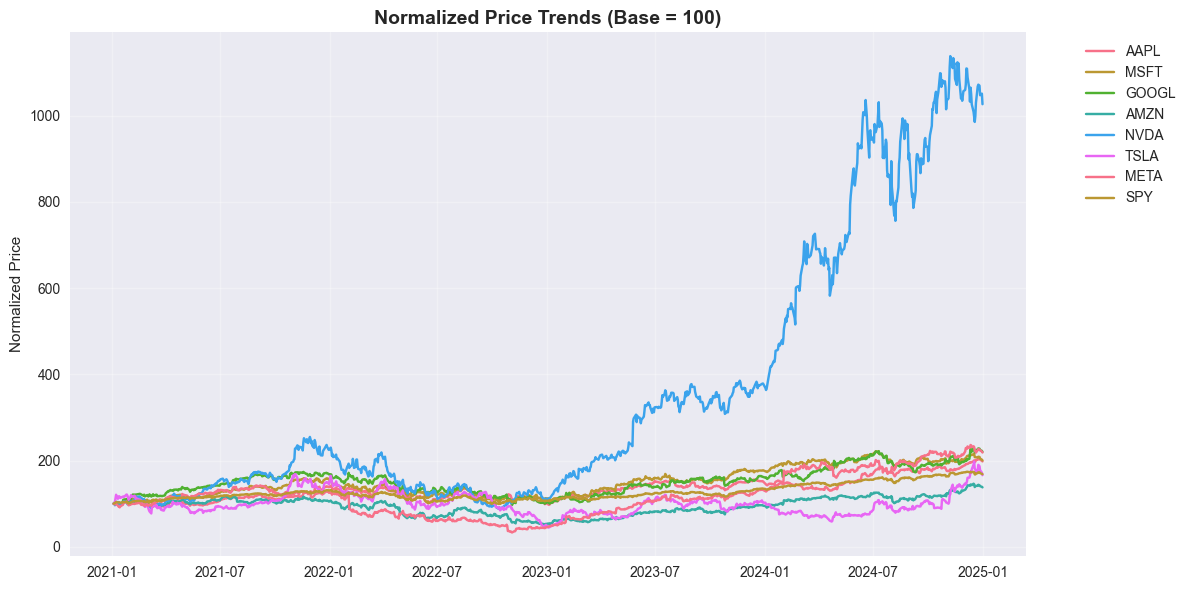

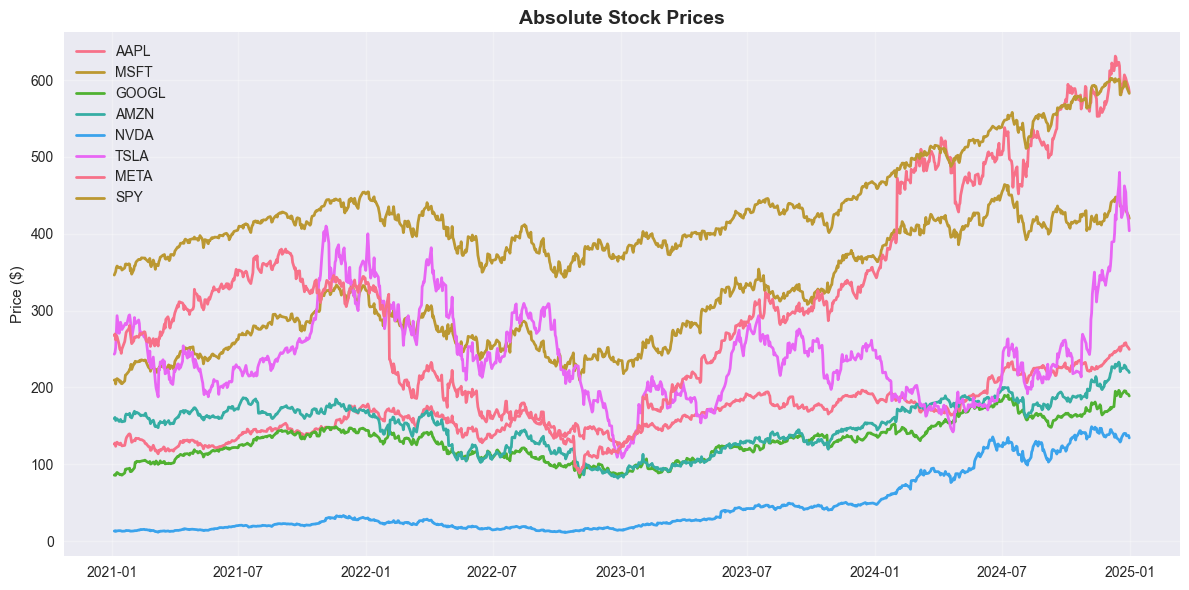

<Figure size 1200x600 with 0 Axes>

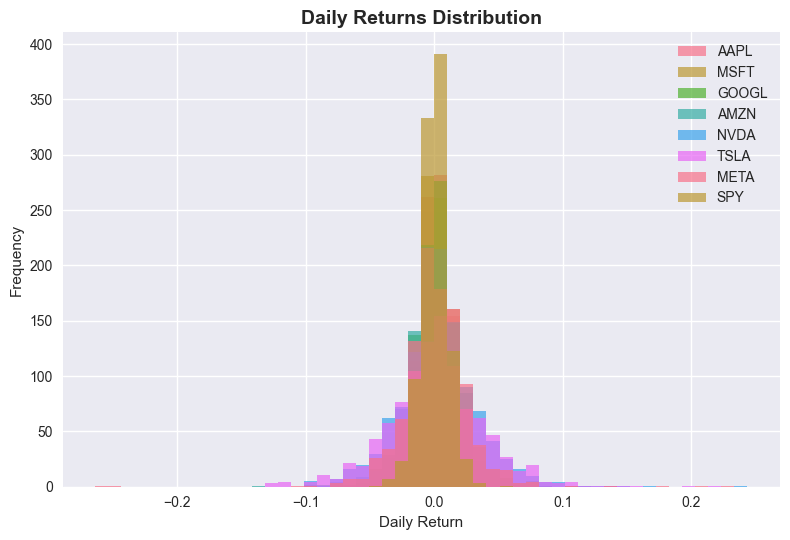

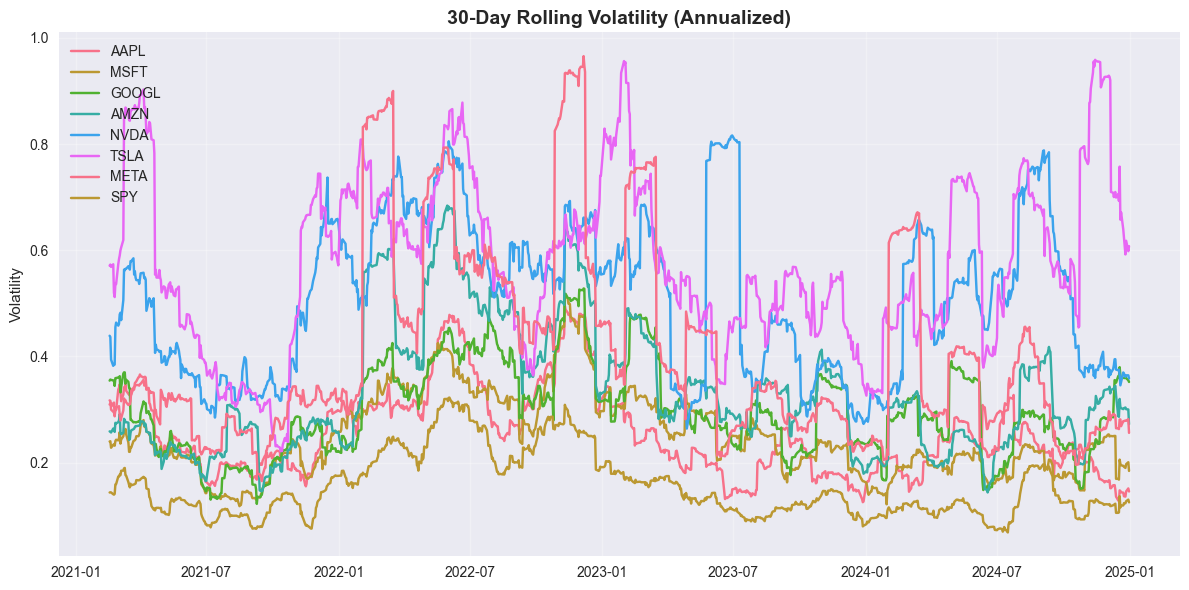

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Combine Close prices from stock_data
close_data = pd.DataFrame()
for ticker, data in stock_data.items():
    if 'Close' in data.columns:
        close_data[ticker] = data['Close']
    else:
        print(f"⚠️ 'Close' column missing for {ticker}")

close_data.dropna(how='all', inplace=True)

# Ensure output directory exists
os.makedirs('results/figures', exist_ok=True)

# 1. Normalized price trends
plt.figure(figsize=(12, 6))
normalized_prices = close_data / close_data.iloc[0] * 100
for col in normalized_prices.columns:
    plt.plot(normalized_prices.index, normalized_prices[col], label=col)
plt.title('Normalized Price Trends (Base = 100)', fontsize=14, fontweight='bold')
plt.ylabel('Normalized Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('results/figures/normalized_price_trends.png', dpi=300)
plt.show()

# 2. Absolute stock prices
plt.figure(figsize=(12, 6))
for col in close_data.columns:
    plt.plot(close_data.index, close_data[col], label=col, linewidth=2)
plt.title('Absolute Stock Prices', fontsize=14, fontweight='bold')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('results/figures/absolute_stock_prices.png', dpi=300)
plt.show()

# Calculate daily returns
returns = close_data.pct_change().dropna()

# 3. Daily returns distribution
plt.figure(figsize=(12, 6))
returns.plot(kind='hist', bins=50, alpha=0.7)
plt.title('Daily Returns Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('results/figures/daily_returns_distribution.png', dpi=300)
plt.show()

# 4. Rolling volatility (30-day)
plt.figure(figsize=(12, 6))
rolling_vol = returns.rolling(window=30).std() * np.sqrt(252)
for col in rolling_vol.columns:
    plt.plot(rolling_vol.index, rolling_vol[col], label=col)
plt.title('30-Day Rolling Volatility (Annualized)', fontsize=14, fontweight='bold')
plt.ylabel('Volatility')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('results/figures/rolling_volatility.png', dpi=300)
plt.show()


### __*Normalized Price Trends (Base = 100)*__

 - NVIDIA (NVDA) shows a dramatic surge, far outpacing other stocks — strong growth driven by AI/semiconductor demand.

 - Other tech giants (AAPL, MSFT, AMZN, GOOGL, META) grew steadily but much more moderately.

 - SPY (S&P 500 ETF) serves as a benchmark, showing slower and steadier growth compared to individual tech stocks.

 - Tesla (TSLA) shows high volatility but did not outperform NVDA in the long run.

### *__Absolute Stock Prices__*

 - Absolute prices confirm NVDA’s breakout trajectory compared to peers.

 - MSFT and AAPL are the next strongest performers in terms of price level.

 - Tesla and Meta show wider fluctuations, indicating more volatility.

 - SPY maintains stable growth, reflecting broader market performance.

### *__Daily Returns Distribution__*

 - Most daily returns cluster around 0%, indicating small day-to-day changes.

 - Distributions are bell-shaped (close to normal), but with fat tails suggesting occasional sharp gains/losses.

 - Stocks like TSLA and NVDA likely contribute more extreme tails (higher volatility).

 - SPY shows tighter distribution, confirming it’s less volatile than individual tech stocks.

### *__30-Day Rolling Volatility (Annualized)__*

 - Tesla and NVDA display the highest and most persistent volatility — risky but with higher growth potential.

 - META also shows periods of elevated volatility, especially during tech market corrections.

 - AAPL and MSFT exhibit relatively lower and more stable volatility, showing resilience.

 - SPY consistently has the lowest volatility, reinforcing its role as a diversified, less risky benchmark.

### *__Overall Insight:__*

 - NVDA is the clear growth outlier but also carries significant risk.

 - Tesla and Meta are highly volatile, making them riskier bets.

 - Apple and Microsoft balance strong growth with stability.

 - SPY provides steady, low-volatility exposure to the market, useful for benchmarking.

# 3. Financial Metrics Calculation and Visualization

In [27]:
class PortfolioAnalyzer:
    """
    Comprehensive portfolio analysis class for financial metrics calculation
    """
    
    def __init__(self, price_data, risk_free_rate=0.02):
        """
        Initialize portfolio analyzer
        
        Parameters:
        -----------
        price_data : pd.DataFrame
            Daily adjusted close prices
        risk_free_rate : float
            Annual risk-free rate (default: 2%)
        """
        self.prices = price_data
        self.returns = price_data.pct_change().dropna()
        self.risk_free_rate = risk_free_rate
        
    def calculate_basic_metrics(self):
        """Calculate fundamental return and risk metrics"""
        
        metrics = pd.DataFrame(index=self.returns.columns)
        
        # Annual returns
        metrics['Annual_Return'] = self.returns.mean() * 252
        
        # Annual volatility
        metrics['Annual_Volatility'] = self.returns.std() * np.sqrt(252)
        
        # Sharpe ratio
        excess_return = metrics['Annual_Return'] - self.risk_free_rate
        metrics['Sharpe_Ratio'] = excess_return / metrics['Annual_Volatility']
        
        return metrics

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class PortfolioAnalyzer:
    """
    Comprehensive portfolio analysis class for financial metrics calculation and visualization.
    """
    
    def __init__(self, price_data, risk_free_rate=0.02, benchmark=None):
        """
        Initialize portfolio analyzer
        
        Parameters:
        -----------
        price_data : pd.DataFrame
            Daily closing prices with dates as index and tickers as columns
        risk_free_rate : float
            Annual risk-free rate (default: 2%)
        benchmark : pd.Series or str
            Benchmark daily closing prices (pd.Series) or ticker symbol (str) for beta calculation
        """
        self.prices = price_data
        self.returns = price_data.pct_change().dropna()
        self.risk_free_rate = risk_free_rate
        
        # Process benchmark returns if provided
        if benchmark is not None:
            if isinstance(benchmark, str):
                # User gave ticker symbol, attempt to extract from price_data columns
                if benchmark in price_data.columns:
                    self.benchmark_returns = price_data[benchmark].pct_change().dropna()
                else:
                    raise ValueError(f"Benchmark ticker '{benchmark}' not found in price_data columns")
            elif isinstance(benchmark, pd.Series):
                self.benchmark_returns = benchmark.pct_change().dropna()
            else:
                raise TypeError("benchmark must be a ticker string or a pd.Series of prices")
        else:
            self.benchmark_returns = None
        
    def calculate_basic_metrics(self):
        """Calculate fundamental return and risk metrics"""
        metrics = pd.DataFrame(index=self.returns.columns)
        
        # Annualized returns
        metrics['Annual_Return'] = self.returns.mean() * 252
        
        # Annualized volatility
        metrics['Annual_Volatility'] = self.returns.std() * np.sqrt(252)
        
        # Sharpe ratio
        excess_return = metrics['Annual_Return'] - self.risk_free_rate
        metrics['Sharpe_Ratio'] = excess_return / metrics['Annual_Volatility']
        
        return metrics
    
    def calculate_max_drawdown(self):
        """Calculate maximum drawdown for each stock"""
        max_drawdowns = {}
        for ticker in self.prices.columns:
            cumulative_max = self.prices[ticker].cummax()
            drawdown = (self.prices[ticker] - cumulative_max) / cumulative_max
            max_drawdowns[ticker] = drawdown.min()
        
        return pd.Series(max_drawdowns, name='Max_Drawdown')
    
    def calculate_beta(self):
        """Calculate beta of each stock relative to the benchmark"""
        if self.benchmark_returns is None:
            raise ValueError("Benchmark returns not provided, cannot calculate beta")
        
        betas = {}
        benchmark_var = self.benchmark_returns.var()
        for ticker in self.returns.columns:
            cov = self.returns[ticker].cov(self.benchmark_returns)
            betas[ticker] = cov / benchmark_var if benchmark_var > 0 else np.nan
        return pd.Series(betas, name='Beta')
    
    def correlation_matrix(self):
        """Calculate and return correlation matrix of returns"""
        return self.returns.corr()
    
    def plot_correlation_heatmap(self, figsize=(10,8), cmap='coolwarm'):
        """Plot correlation heatmap of returns"""
        corr = self.correlation_matrix()
        plt.figure(figsize=figsize)
        sns.heatmap(corr, annot=True, cmap=cmap, fmt=".2f", square=True, linewidths=.5)
        plt.title("Return Correlation Heatmap")
        plt.show()
    
    def portfolio_metrics(self, weights):
        """
        Calculate portfolio-level weighted metrics
        
        Parameters:
        -----------
        weights : list or np.array
            Portfolio weights for each stock in same order as price_data columns
            
        Returns:
        --------
        dict : portfolio metrics (annual return, volatility, sharpe ratio)
        """
        weights = np.array(weights)
        if len(weights) != len(self.returns.columns):
            raise ValueError("Length of weights must match number of assets")
        if not np.isclose(weights.sum(), 1):
            raise ValueError("Weights must sum to 1")
        
        # Calculate weighted daily returns
        portfolio_returns = self.returns.dot(weights)
        
        # Annualized portfolio return and volatility
        annual_return = portfolio_returns.mean() * 252
        annual_vol = portfolio_returns.std() * np.sqrt(252)
        
        sharpe = (annual_return - self.risk_free_rate) / annual_vol if annual_vol != 0 else np.nan
        
        return {
            'Annual_Return': annual_return,
            'Annual_Volatility': annual_vol,
            'Sharpe_Ratio': sharpe
        }
    
    def plot_return_vs_volatility(self):
        """Scatter plot of Annual Return vs Annual Volatility with Sharpe ratio coloring"""
        metrics = self.calculate_basic_metrics()
        
        plt.figure(figsize=(10, 6))
        sc = plt.scatter(
            metrics['Annual_Volatility'],
            metrics['Annual_Return'],
            c=metrics['Sharpe_Ratio'],
            cmap='viridis',
            s=100,
            edgecolors='k'
        )
        plt.colorbar(sc, label='Sharpe Ratio')
        for i, ticker in enumerate(metrics.index):
            plt.text(metrics['Annual_Volatility'][i], metrics['Annual_Return'][i], ticker, fontsize=9)
        plt.xlabel('Annual Volatility')
        plt.ylabel('Annual Return')
        plt.title('Return vs Volatility (Sharpe Ratio colored)')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    def summary_report(self):
        """Print a formatted summary report of metrics including Beta and Max Drawdown"""
        basic_metrics = self.calculate_basic_metrics()
        max_dd = self.calculate_max_drawdown()
        report = basic_metrics.join(max_dd)
        
        if self.benchmark_returns is not None:
            beta = self.calculate_beta()
            report = report.join(beta)
        
        print("\nPortfolio Analysis Summary")
        print("="*60)
        print(report.round(4))
        print("="*60)


📊 PORTFOLIO PERFORMANCE SUMMARY


,Annual_Return,Annual_Volatility,Sharpe_Ratio
AAPL,20.66%,26.60%,0.702
MSFT,20.84%,26.07%,0.722
GOOGL,24.56%,30.84%,0.732
AMZN,14.25%,35.29%,0.347
NVDA,72.30%,52.87%,1.330
TSLA,30.63%,60.06%,0.477
META,29.75%,44.67%,0.621
SPY,14.42%,16.48%,0.754



Portfolio Analysis Summary
       Annual_Return  Annual_Volatility  Sharpe_Ratio  Max_Drawdown
AAPL          0.2066             0.2660        0.7018       -0.3091
MSFT          0.2084             0.2607        0.7225       -0.3715
GOOGL         0.2456             0.3084        0.7315       -0.4432
AMZN          0.1425             0.3529        0.3472       -0.5615
NVDA          0.7230             0.5287        1.3296       -0.6634
TSLA          0.3063             0.6006        0.4766       -0.7363
META          0.2975             0.4467        0.6213       -0.7674
SPY           0.1442             0.1648        0.7539       -0.2450


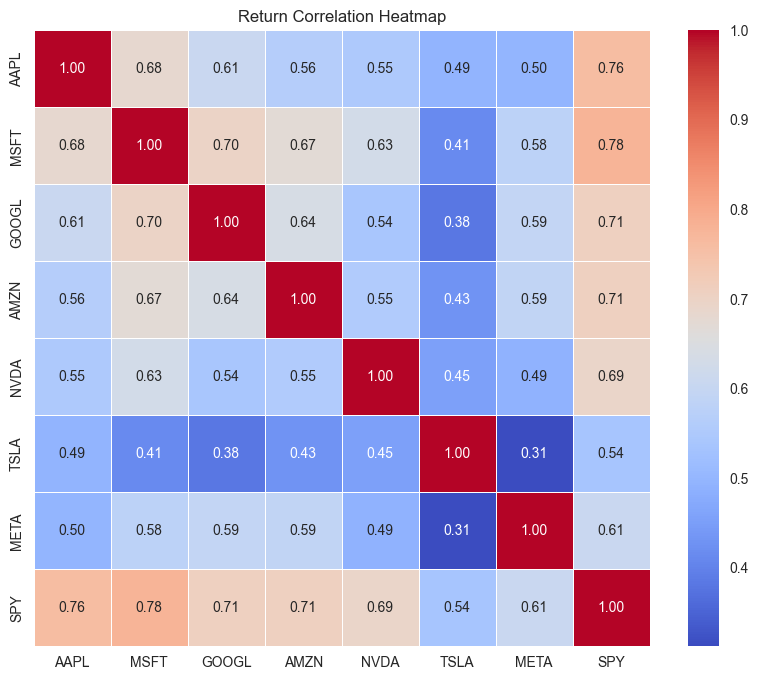

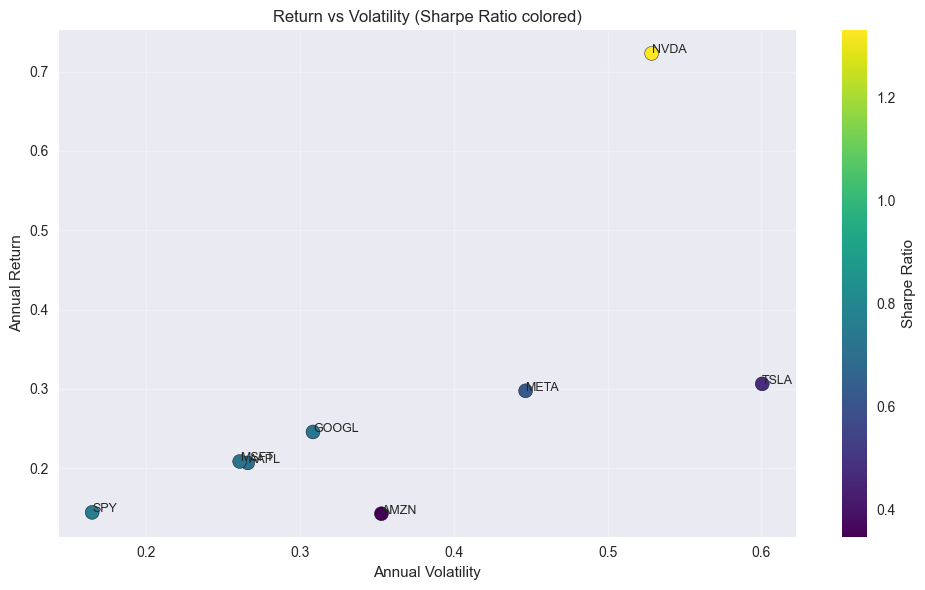


Portfolio-level Metrics (Equal Weights):
{'Annual_Return': np.float64(0.28427607707825475), 'Annual_Volatility': np.float64(0.2826717242213589), 'Sharpe_Ratio': np.float64(0.9349222240258506)}


In [29]:
# Calculate and display results professionally
analyzer = PortfolioAnalyzer(close_data)
basic_metrics = analyzer.calculate_basic_metrics()

print("📊 PORTFOLIO PERFORMANCE SUMMARY")
print("=" * 60)

# Format results nicely
formatted_results = basic_metrics.copy()
formatted_results['Annual_Return'] = formatted_results['Annual_Return'].apply(lambda x: f"{x:.2%}")
formatted_results['Annual_Volatility'] = formatted_results['Annual_Volatility'].apply(lambda x: f"{x:.2%}")
formatted_results['Sharpe_Ratio'] = formatted_results['Sharpe_Ratio'].apply(lambda x: f"{x:.3f}")

display(formatted_results)

analyzer.summary_report()
analyzer.plot_correlation_heatmap()
analyzer.plot_return_vs_volatility()

# Portfolio weighted metrics example (equal weights)
weights = [1/len(close_data.columns)] * len(close_data.columns)
port_metrics = analyzer.portfolio_metrics(weights)
print("\nPortfolio-level Metrics (Equal Weights):")
print(port_metrics)


# Save results
#basic_metrics.to_csv('results/reports/portfolio_metrics.csv')
#print("\n✅ Results saved to results/reports/portfolio_metrics.csv")

# 4. Portfolio Performance Insights

### 1. Return and Risk Profile

- ##### __Highest Return__:

    - NVIDIA (NVDA) dominates with 72.3% annual return, far higher than all others. However, it comes with the highest volatility (52.9%) and deep drawdowns (-66.3%).

    - GOOGL (24.6%) and TSLA (30.6%) also delivered strong returns but at elevated volatility levels (30.8% and 60.1% respectively).

- ##### __Lowest Return__:

     - Amazon (AMZN) and SPY lagged with annual returns of 14.2% and 14.4%, respectively.

     - However, SPY achieved this with lowest volatility (16.5%) and the most stable performance (max drawdown of -24.5%).

### 2. Risk-Adjusted Performance (Sharpe Ratio)

- ##### __Best Sharpe Ratio__:

    - NVIDIA (1.33) – despite high volatility, NVDA’s returns more than compensate for the risk, making it the standout performer.

    - SPY (0.75) – while offering modest returns, it provides excellent consistency and reliability.

- ##### __Weaker Risk-Adjusted Performers__:

    - Amazon (0.35) and Tesla (0.47) show relatively poor Sharpe Ratios, meaning their high volatility hasn’t translated into efficient returns.

    - Meta (0.62) is moderate but less attractive compared to MSFT, AAPL, or NVDA.

### 3. Drawdown Risk

- Most Resilient: SPY (-24.5%) and AAPL (-30.9%) managed risk better than others.

- Most Vulnerable: META (-76.7%) and TSLA (-73.6%) suffered the deepest drawdowns, reflecting their higher exposure to market cycles and volatility shocks.

### 4. Return Correlations

- ##### __High Correlation with SPY__:

    - MSFT (0.78), AAPL (0.76), and GOOGL (0.71) move closely with the overall market.

    - These stocks tend to follow broader market trends, reducing diversification benefits.

- ##### __Lower Correlations (Diversification Opportunities)__:

    - TSLA shows weaker correlations (avg. ~0.40) with peers, meaning it can diversify portfolios but comes at the cost of much higher volatility.

    - NVDA also shows relatively weaker correlations (~0.55–0.63), offering partial diversification benefits.

### 5. Return vs Volatility Trade-Off (Scatterplot)

- ##### __Efficient Frontier Candidates__:

    - NVIDIA: Extremely high return for high volatility (ideal for aggressive investors).

    - SPY: Low volatility and strong Sharpe ratio (ideal for conservative investors).

    - MSFT & AAPL: Balanced positions with solid risk-adjusted returns (~0.70 Sharpe).

- ##### __Lagging Behind__:

    - AMZN sits below the return-risk frontier (low returns for the level of risk).

    - META and TSLA offer higher returns but at disproportionately high volatility.

## Key Takeaways

- For Growth Seekers: NVIDIA and GOOGL provide the highest upside, but with elevated volatility.

- For Stability: SPY offers the best balance of consistent returns, low volatility, and resilience.

- For Balanced Allocation: MSFT and AAPL stand out as high-quality, stable growth options.

- Caution Required: TSLA, META, and AMZN exhibit poor risk-adjusted efficiency or deep drawdowns, making them riskier for long-term stability.
